In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import diff, symbols, lambdify
from sympy.abc import x, y

In [2]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

In [5]:
# 0-1 normalization

def normalization (x):
    return (x - min(x)) / (max(x) - min(x))


In [6]:

att['Salnty'] = normalization(att['Salnty'])
att['T_degC'] = normalization(att['T_degC'])


In [7]:
batchSize = 100

In [8]:
x_data = att['Salnty'].loc[:batchSize].tolist()
y_data = att['T_degC'].loc[:batchSize].tolist()
# y_data = b + w * data_x

# att['T_degC'].tolist()
# att['Salnty'].tolist()

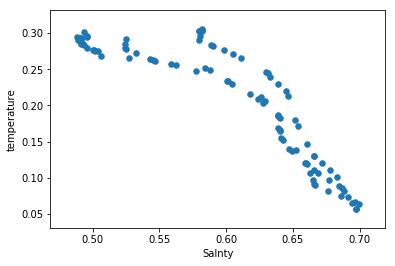

In [9]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('temperature')
plt.show()

In [51]:
b = random.uniform(-1, 1) # initial b
w = random.uniform(-1, 1) # initial w
lr = 1 # learning rate
iteration = 500

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# let the learning be different
lr_b = 0
lr_w = 0

x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
diff_b = lambdify([x, y, w1, b1], diff(lossf, b1))
diff_w = lambdify([x, y, w1, b1], diff(lossf, w1))

# interation start, use gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = loss + (y_data[n] - (b + w*x_data[n]))**2
        
        # compute ∂L/∂w 
        b_grad = b_grad + diff_b(x_data[n], y_data[n], w, b)
        
        # compute ∂L/∂b
        w_grad = w_grad + diff_w(x_data[n], y_data[n], w, b)
    
    # use Adagrad to for leanring rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    print(b, w, loss)
    
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

-0.03286392344160394 -1.3632396726809808 29.80932616682904
0.8584117575455311 -0.47328368946796506 113.93798883697924
0.5652888295533184 -0.7685378463920349 13.763917119145539
0.6497509044957334 -0.6860818691724432 1.3174180050171787
0.6269813801533408 -0.7108934851439733 0.29762717425699614
0.6343554232573142 -0.7055424327852631 0.21656499617706312
0.6332581062720583 -0.708658366183397 0.20980929997044054
0.6345366664908175 -0.709389893126531 0.20892063323837612
0.6351442000985572 -0.7107851150897478 0.20849756696161031
0.6359365702732507 -0.7119878692673255 0.20811389605368583
0.6366733866532677 -0.7132386666307388 0.20773597261352977
0.6374221862703249 -0.714469972757811 0.20736112196471876
0.6381640123465554 -0.7157007800030377 0.20698911333062295
0.6389042032565491 -0.7169257761829705 0.20661990891644919
0.6396412730841279 -0.7181464759011166 0.20625348629834012
0.640375652725507 -0.7193624761120601 0.205889824412523
0.6411072346166352 -0.7205739123295871 0.20552890244775085
0.641

0.768732649649358 -0.931907965686403 0.16345067074184094
0.7689798061648327 -0.9323172305615897 0.16340947493804353
0.7692260299654586 -0.9327249509604828 0.1633685894729628
0.7694713245712745 -0.933131132711889 0.16332801200869784
0.7697156934890325 -0.933535781622614 0.1632877402249597
0.7699591402122488 -0.933938903477545 0.16324777181894054
0.7702016682212526 -0.9343405040397351 0.16320810450518003
0.7704432809832373 -0.9347405890504836 0.16316873601543694
0.7706839819523088 -0.93513916422942 0.16312966409855686
0.7709237745695358 -0.9355362352745845 0.16309088652034512
0.7711626622629983 -0.9359318078625105 0.16305240106343885
0.7714006484478374 -0.9363258876483053 0.16301420552717993
0.7716377365263037 -0.9367184802657308 0.1629762977274888
0.771873929887806 -0.9371095913272848 0.16293867549674018
0.77210923190896 -0.9374992264242807 0.1629013366836387
0.7723436459536361 -0.9378873911269279 0.16286427915309595
0.7725771753730086 -0.9382740909844107 0.16282750078610844
0.772809823

In [ ]:
'''
original one
b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
'''

In [46]:
'''
x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
# expr = lossf.diff(w1)
expr = lambdify([x, y, w1, b1], diff(lossf, w1))
expr(x_data[0], y_data[0], w, b)
'''

"\nx, y, w1, b1 = symbols('x, y, w1, b1')\nlossf = (y - (b1 + w1*x))**2\n# expr = lossf.diff(w1)\nexpr = lambdify([x, y, w1, b1], diff(lossf, w1))\nexpr(x_data[0], y_data[0], w, b)\n"

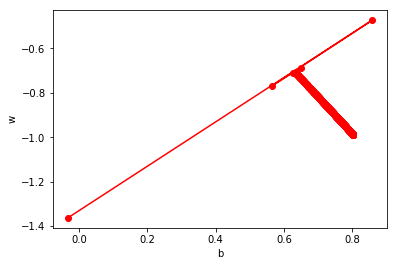

In [52]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

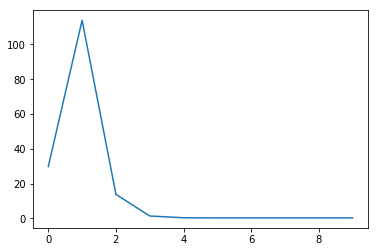

In [53]:
# visualize the loss
fig = plt.figure()
plt.plot(range(0,10), loss_history[0:10])    
plt.show()

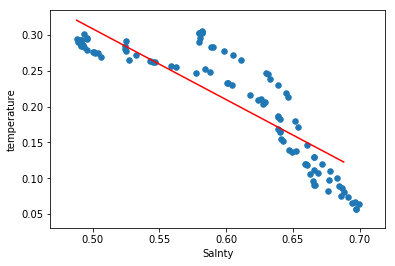

In [54]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('temperature')

x = np.arange(min(x_data), max(x_data), 0.1)
y = w*x + b
plt.plot(x, y, color = 'red')
plt.show()